## Imports and Paths

In [ ]:
# imports
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm 
from datetime import datetime


In [ ]:
# connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# set paths
data_path="drive/MyDrive/Work/Frontline/data/filtered2"



### Read & Combine Data


In [ ]:
dfs = []

# loop through files 
for filename in os.listdir(data_path):
    # if csv file, load and add to dfs  
    if filename.endswith(".csv"):
        file_path = os.path.join(data_path, filename)
        df = pd.read_csv(file_path, index_col=0)
        dfs.append(df)

# combine files in df
df = pd.concat(dfs, ignore_index=True)

### Data  and Plots

Wie viele Artikel gibt es über häusliche Gewalt?

In [52]:
print(f"Es gibt {len(df)} Artikel zum Thema häusliche Gewalt, die in {len(df.name.value_counts())} Zeitungen erschienen")

Es gibt 1247840 Artikel zum Thema häusliche Gewalt, die in 244 Zeitungen erschienen


Wie viele Artikel veröffentlichen Zeitungen über häusliche Gewalt?




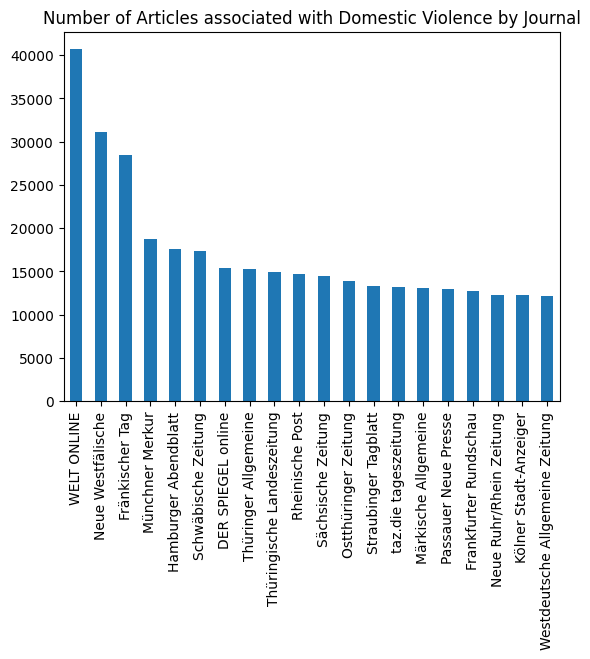

In [31]:
df["name"].value_counts()[:20].plot(kind="bar", title="Number of Articles associated with Domestic Violence by Journal");

In [32]:
df["name"].value_counts() 

WELT ONLINE                          40676
Neue Westfälische                    31141
Fränkischer Tag                      28442
Münchner Merkur                      18770
Hamburger Abendblatt                 17608
                                     ...  
Spiegel Start                            5
Bild der Frau schlank & fit              3
Auto Bild Tuning                         2
Auto Bild motorsport                     1
Bild der Frau gut kochen & backen        1
Name: name, Length: 244, dtype: int64

In welchen Ressorts wird veröffentlicht?


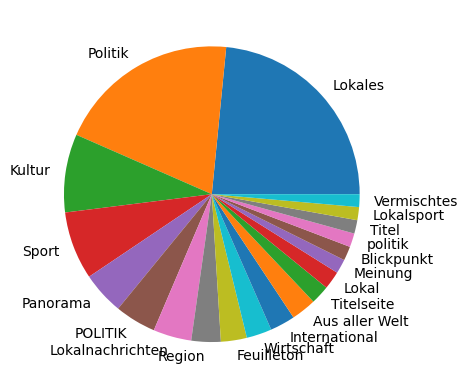

In [42]:
plt.pie(df.ressort.value_counts()[:20],labels =df.ressort.value_counts()[:20].index);

Wann werden Zeitungen veröffentlicht?

In [82]:
## articles without date
df.datum.isna().sum()

15

In [207]:
dates=df[~df.datum.isna()].datum.astype(int)
dates=pd.to_datetime(dates, format="%Y%m%d")

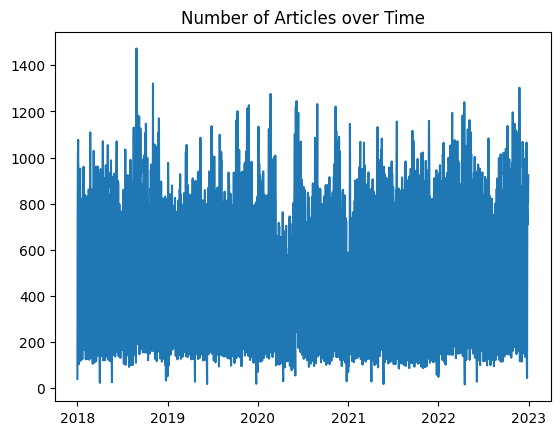

In [221]:
lists = sorted(dict(Counter(dates)).items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot([pd.to_datetime(i) for i in x], y)
plt.title("Number of Articles over Time")
plt.show("bar")

In [209]:
dates_month=[i.to_period("M") for i in dates]
dates_month=pd.DataFrame(dates_month)[0]

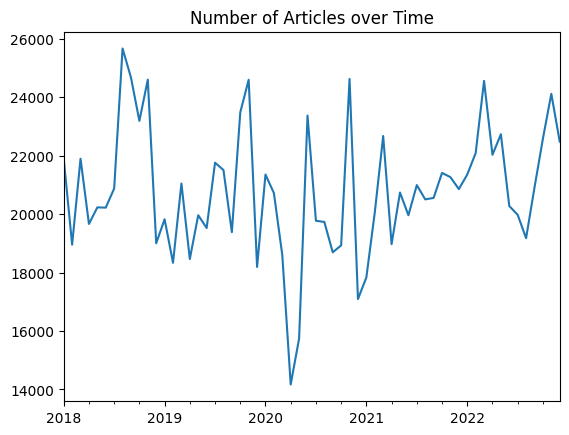

In [210]:
dates_month.value_counts().sort_index().plot(title="Number of Articles over Time");

In [219]:
dates_month.value_counts()[dates_month.value_counts()>24000].sort_index()

2018-08    25668
2018-09    24672
2018-11    24601
2019-11    24597
2020-11    24626
2022-03    24558
2022-11    24117
Freq: M, Name: 0, dtype: int64

Länge der Artikel

In [171]:
from collections import Counter


In [166]:
lengths=[len(("".join(i).split(" "))) for i in df.text]

In [169]:
lengths_rounded=[round(i)for i in lengths]

Text(0.5, 1.0, "Distribution of Articles Lengths'")

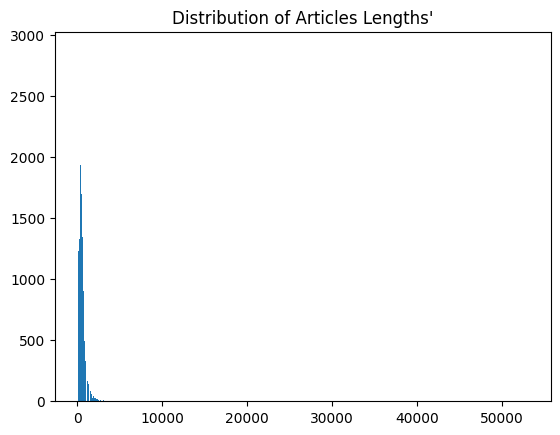

In [182]:
plt.bar(dict(Counter(lengths_rounded)).keys(),dict(Counter(lengths_rounded)).values());
plt.title("Distribution of Articles Lengths'");

In [201]:
idx=[i>10000 for i in lengths]
print(f"{df[idx].shape[0]} articles have a length of >10000 words")


256 articles have a length of >10000 words
